# Multivariate Analysis

We have done univariate analyses in the previous module. 
All the datasets we have looked into so far were multivariate, 
but we focused on analyzing individual variables, performing basic descriptive and inferential statistics. 
Afterward, we did some bivariate analyses. 
However, what if you wanted to analyze more than two variables at once? 
In this module, the focus will be on multivariate data.

Multivariate data can have two or more dimensions. 
Often, more than one variable is collected in an experiment or any observation. 
When considering multivariate data, we must take into account interdependencies and correlations of data vectors.

For example, in a demographic study, many features such as age, sex, race, education, job, 
income level and so on are included in the survey. 
The datasets will have more than two quantitative variables for each row/observation.

A key issue to address is that with increasingly wide data sets, 
it becomes increasingly more challenging to do visual exploration of the data. 
Visual exploration is possible when looking at a dataset with 2, 3, 4 variables,
but anything beyond this range should be dealt with using numerical analyses. 

### What is a vector?

Besides its meaning in Linear Algebra, the word vector can also be use to approximate the meaning of the term "variable".
Data scientists may often use the four following words (variable, vector, array, and distribution)
interchangeably.

A variable (a column in a data frame) consists of multiple elements and can be considered as a vector. 
When multiple vectors (variables) are combined and stored into a data set in R, we call it a data frame where each 
**row** represents an **observation** or **data point** or **datum**, and each **column** represents a **variable**. 


When R stores variables into a data frame, it assigns a role to indicate how the data will be 
used in subsequent statistical analyses.
So in R dataframes, for example, the "double" data type are assigned the role of num and 
"integers" are assigned the role of int (the "complex" data type is assigned the role of 
"cplx," but don't worry about that now). These roles *usually* correspond to statistical data types as follows: 
 * Factor = nominal,
 * int = ordinal, and 
 * num = interval.

Additionally, we can also call every observation (row) within a dataset a vector of related values.


## Bivariate Data

Previously, we discussed measures of central tendency, variability, and spread. 
These summarize a **single variable** by providing important information about its distribution. 


Before discussing multivariate data, let's recap bivariate data. 
As you may recall, bivariate analysis consists of two quantitative variables. 
It is analogous to summarizing univariate (single variable) data.

For illustration, consider analysis of abdominal circumference vs. gestation period. 
Let’s begin by asking if abdominal circumference varies with gestation period. 
From experience we can say it's true, but how good is this association? 
One way to address the question is to look at abdominal circumference against gestation period for a sample of the data. 

<img src="../images/table_data.PNG">

Going across the columns we see that, babies with higher gestation periods tend to have higher abdominal circumference than babies with lower gestation periods but this is not true in all cases. 
The data reflects our experience but the expecation is not always the case.

In [1]:
ac_data = read.csv("/dsa/data/all_datasets/abdominal circumference/ac.csv")
ac_data = ac_data[,2:ncol(ac_data)]
head(ac_data)

,gawks,ac
,<dbl>,<int>
1,12.28571,59
2,12.28571,64
3,12.28571,56
4,12.42857,61
5,12.71429,74
6,12.71429,60


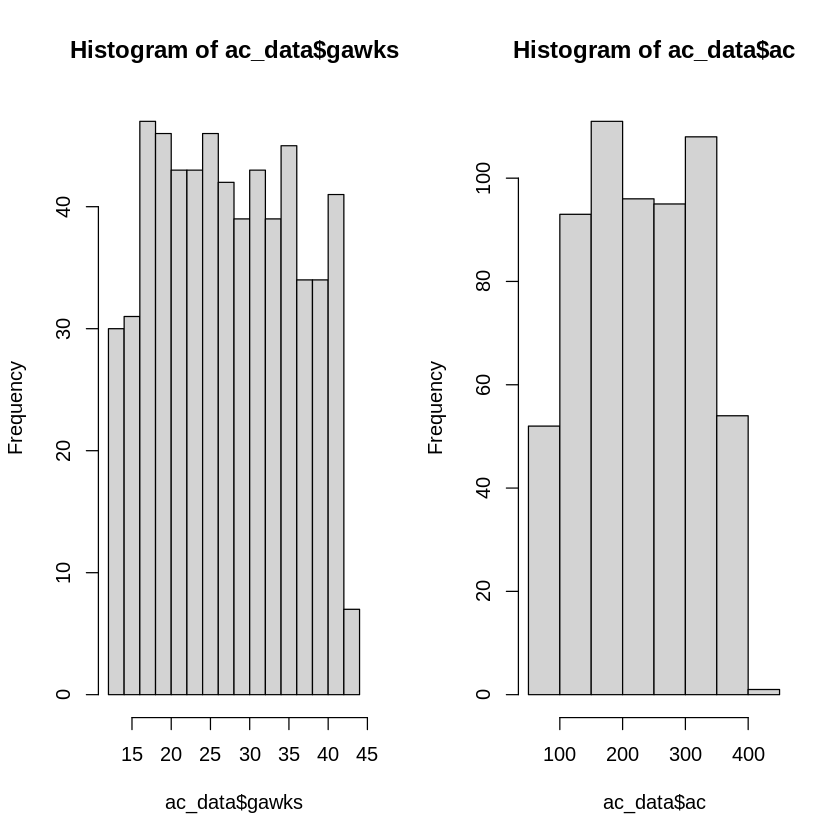

In [2]:
par(mfrow=c(1,2))
hist(ac_data$gawks)
hist(ac_data$ac)

#mfrow() is a function that computes a layout for a plot array.  Given a number of plots n, it finds an
#arrangement for showing the plots in an array, set by par(mfrow=mfrow(n)).

Here are the means and standard deviations of gestation period and abdominal circumference
   
<table>
    <tr>
        <th></th>
        <th>gawks</th>
        <th>ac</th>
    </tr>
    <tr>
        <td><b>mean</b></td>
        <td>27.26</td>
        <td>226.71</td>
    </tr>
    <tr>
        <td><b>sd</b></td>
        <td>8.45</td>
        <td>88.64</td>
    </tr>
</table>


From the first table above we can see that not all babies with a longer gestation period have a larger abdominal circumference. 
This relationship can't be seen when we separate the variables. 
We cannot answer questions based on means or standard deviation alone. 
For example, based on means alone, we can't answer what percentage of babies have an abdominal circumference greater than 300. 
We have to count across pairs to find this out. 
Another example where information is not available from the separate descriptions of gestation period and abdominal circumference is the mean gestation period of babies with certain abdominal circumferences. 
Finally, we don't know the relationship between gestation period and abdominal circumference.

We can learn more by displaying the bivariate data in a graphical form that maintains the pairing as shown below. The x-axis represents the gestation period of babies and the y-axis has abdominal circumference.

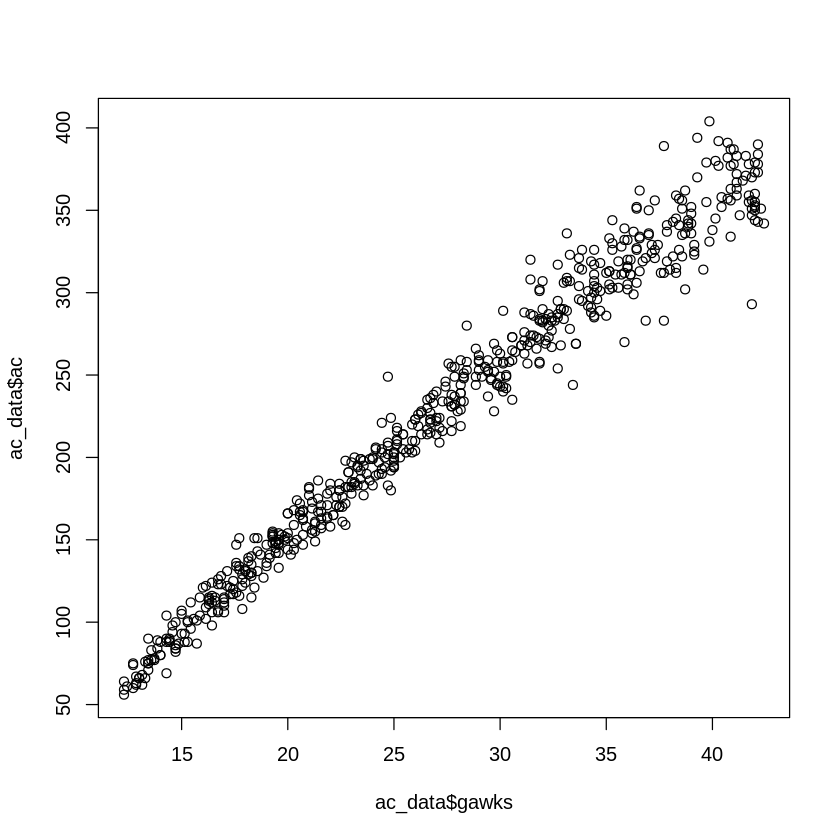

In [3]:
plot(ac_data$gawks,ac_data$ac)

There are two important characteristics of the data revealed from above plot. 
First, there is a strong relationship between the gestation period and abdominal circumference: 
the longer the gestation period the greater the abdominal circumference, generally speaking.
When one variable (Y) increases with the second variable (X), we say that X and Y have a positive association. Conversely, when Y decreases as X increases, we say that they have a negative association.

Notice how the points are clustered along a **straight line**. 
This relationship is called a **linear relationship**.

Scatter plots that show linear relationships between variables can differ in several ways including the slope of the line about which they cluster and how tightly the points cluster about the line. 


A statistical measure of the strength of the relationship between two quantitative variables that takes these factors into account is **Pearson's Correlation** or simply the **correlation coefficient**.

Before we learn more about correlation we should look into covariance first. 

---

### Covariance

The covariance of two variables X and Y in a data set measures how the two are linearly related. 
It’s similar to variance, where variance tells you how a single variable varies, 
but covariance tells you **how two variables vary together**. 

A positive covariance would indicate a positive linear association between the variables, 
and a negative covariance would indicate the opposite.

$$cov(X,Y) = E([X-E(X)][Y-E(Y)])$$

Covariance only indicates the **direction** of the association, the magnitude depends on the scale of the variables. 
If we normalize it by the standard deviations, we get the **correlation**. 


$$cor(X,Y) = \frac{cov(X,Y)}{sd(X)sd(Y)}.$$

Correlation is in [-1,1] ranage and shows both direction and the strength of the relationship. 

In [4]:
cov(ac_data$gawks,ac_data$ac)

[1] 739.4914

### Why do we need to estimate correlation?

The problem with covariances is that they are hard to compare. 
For example when you calculate the covariance of a set of heights and weights, 
as expressed in meters and kilograms respectively, 
you will get a different covariance from when you do it in other units. 
Additionally, it will be hard to tell if, for example, height and weight 'covary better' than, 
for example the length of your toes and fingers, 
simply because the 'scale' you calculate the covariance on is different.

The solution to this is to 'normalize' the covariance. 
The covariance is divided by something that represents the diversity and scale in both the covariates, 
and you end up with a value  between -1 and 1, which is the correlation coefficient. 
Whatever unit your original variables were in, normalizing the covariance between -1 and 1 means that you can, to a certain degree, compare whether two variables 'correlate' more than other sets of two variables 
simply by comparing their correlation coefficient.

**If the relationship between the variables is not linear**, 
then the correlation coefficient does not adequately represent the strength of the relationship between the variables. 


The symbol for Pearson's correlation is $\rho$ when it is measured in the **population** and $r$ when it is measured in a **sample**. 


An r of -1 indicates a perfect negative linear relationship between variables, an r of 0 indicates no **linear** relationship between variables, and an r of 1 indicates a perfect positive linear relationship between variables. 

**[Take a look at the graphics here.](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)**

Note that the variables could still be in a **nonlinear** relationship even though r is zero. Also, note that r does NOT represent the slope of the relationship. 

In [5]:
cor(ac_data, use="pairwise.complete.obs", method="pearson")

,gawks,ac
gawks,1.0000000,0.9863109
ac,0.9863109,1.0000000


**Properties of Pearson's R**: 
* Pearson's correlation is symmetric in the sense that the correlation of X with Y is the same as the correlation of Y with X. You can see that in above result. 



* A critical property of Pearson's r is that it is **unaffected** by linear transformations. This means that multiplying a variable by a constant and/or adding a constant does not change the correlation of that variable with other variables. For instance, the correlation of Weight and Height does not depend on whether Height is measured in inches, feet, or even miles. Similarly, adding five points to every student's test score would not change the correlation of the test score with other variables such as GPA.

### How to Compute Pearson's r

There are many ways (formulas) to compute Pearson's correlation. 
Some formulas make more conceptual sense, whereas others are easier to actually compute.


**Calculation of r**

<img src="../images/computing_pearsons_r.PNG">

Consider we have to calculate pearsons r value for columns X and Y in above table. 
Begin by computing the mean for X and subtracting this mean from all values of X. 
The new variable is called "x." 
The variable "y" is computed similarly. 
The variables x and y are said to be deviation scores because each score is a deviation from the mean. 
Notice that the means of x and y are both 0 (if the data is normally distributed, 
the deviation would be almost zero). 
The same is explained in the next cell for gawks in ac_data.

In [6]:
options(scipen=999)

ac_data_gawks_mean = mean(ac_data$gawks)
ac_data_gawks_dev = ac_data$gawks-ac_data_gawks_mean
sum(ac_data_gawks_dev)

[1] -0.0000000000008952838

Next we create a new column by multiplying x and y. 

Summing the **xy** column reveals the relationship between X and Y. Why?

   If there was no relationship between X and Y, then positive values of x would be just as likely to be paired with negative values of y as with positive values. This would make negative values of xy as likely as positive values and the sum would be small. On the  other hand, consider Table 1 in which high values of X are associated with high values of Y and low values of X are associated with low values of Y. You can see that positive values of x are associated with positive values of y and negative values of x are associated with negative values of y. In all cases, the product of x and y is positive, resulting in a high total for the xy column. Finally, if there were a negative relationship then positive values of x would be associated with negative values of y and negative values of x would be associated with positive values of y. This would lead to negative values for xy.

Pearson's r is designed so that the correlation between variables is the same no matter what units they are measured in.
To achieve this property, Pearson's correlation is computed by dividing the sum of the xy column (Σxy) by the square root of the product of the sum of the $x^2$ column (Σ$x^2$) and the sum of the $y^2$ column (Σ$y^2$). 
The resulting formula is:

$$r = \frac{\sum xy}{\sqrt{\sum x^2 \sum y^2}}$$

### Variable distribution compared to a scalar value

A variable (column in a data frame) can be analyzed using visuals and scalar values. 
The plot below shows the distribution of gestation period values with the mean highlighted in red. 
A scalar value: 27.2669789508197 for mean would give less information against the distribution of the variable. 

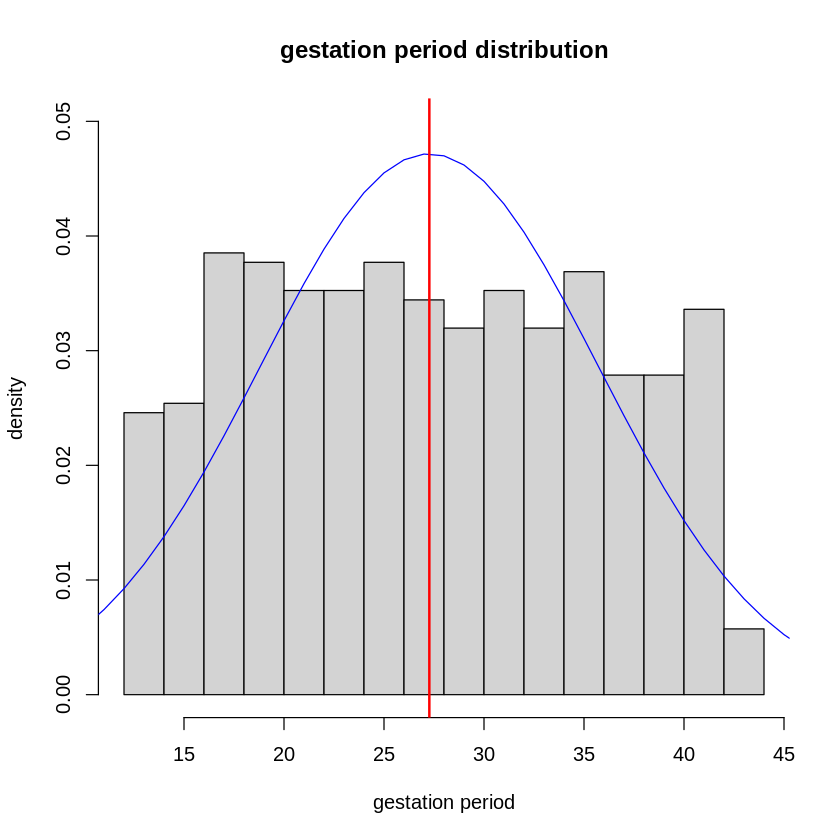

In [7]:
x <- 0:50

hist(ac_data$gawks, probability = TRUE,main="gestation period distribution",xlab="gestation period",ylab="density",ylim = c(0, 0.05))
# x <- min(ac_data$gawks):max(ac_data$gawks)
y <- dnorm(x = x, mean = mean(ac_data$gawks), sd = sd(ac_data$gawks))
lines(x = x, y = y, col = "blue")
abline(v = mean(ac_data$gawks), col = "red", lwd =2)

## Why do we need vectors?

Nearly everything in mathematical modeling is a vector in one way or another. 
Vectors can have any number of dimensions. 
In the prior module we were looking at one-dimensional vectors, but they can have hundreds, 
thousands, or occasionally millions of dimensions. 
Some examples of vectors are: stock indices, images, videos, audio signals, probability densities, in fact almost anything called a distribution, GPS solutions, and survey responses on scales are all vectors. 

One dimensional vectors look just like plain old numbers. 
They explain why real numbers have signs, i.e. directions.

In most Data Science problems you have a dataset in the form of **m rows and n columns** where each row is a datum, 
point, or observation and each column is a feature or attribute.

The dataset is then a `m x n` matrix and you can represent it in many different ways. 
You can approximate any point in your data as a linear combination of some vectors or as a base of a vector space. 
The choice of base depends on the problem you are trying to solve since different algorithms create different bases.
For example, algorithms such as SVD/PCA, NMF, and K-Means will create different bases.

So, from the point of view of Data Science a vector space creates a representation of data from the point of view of a given base.

# Save your Notebook